In [18]:
# Lozano Garcia Eduardo Alejandro (Github: Ale9806)
# BMSIS Visiting Scholar,Washington D.C. ,IPN Biomedical Engeneering Mexico City 
# 10/29/2020

import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import cv2

In [19]:
### Basic operations ###
def imread(file):
    """ Reads image """
    path = 'images\\'            # Set path of images 
    img = cv2.imread(path+file)  # Read image with opencv
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return img                   

def imgray(img):
    """ Transforms RGB Image to grayscale image """
    ### weithing average of the 3 channels ###
    img_gray = (0.333*img[:,:,0] + 0.333*img[:,:,1] +  0.333*img[:,:,2]).astype(np.uint8)  
    return img_gray

def summary(img):
    tipo      = type(img)    # Get type
    size      = img.shape    # Get shape
    data_type = img.dtype    # Get the Data type
    ### Print summary of variable ###
    print(f"type: {tipo}, dtype: {data_type}, shape: {size}")

def imshow(img):
    try:                              # Try  
        img.shape(2)                  # This will only run if we enconunter a tensor of order 3 (n,m,c*)  therefore image is RGB             
        plt.imshow(img)               # Plot RGB image
    except:                           # Except
        gray  =  plt.get_cmap("gray")                   # Select gray cmap
        norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
        plt.imshow(img,cmap=gray,norm=norm )            # Show gray image (matrix) with cmpa 
        
    plt.axis('off')                   # Delete axis 
    plt.show()                        # Show image 
 




def imshow3(img1,img2,img3,title1,title2,title3):
    try:                              # Try  
        img1.shape(2)                  # This will only run if we enconunter a tensor of order 3 (n,m,c*)  therefore image is RGB             
        fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,17))
        ax[0].imshow(img1)               # Plot RGB image
        ax[1].imshow(img2)               # Plot RGB image
        ax[2].imshow(img3)               # Plot RGB image
        ax[0].axis('off')             # Delete axis 
        ax[1].axis('off')             # Delete axis 
        ax[2].axis('off')             # Delete axis 
       
    except:                           # Except
        gray  =  plt.get_cmap("gray")                   # Select gray cmap
        norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
        fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,17))
        ax[0].imshow(img1,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[1].imshow(img2,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[2].imshow(img3,cmap=gray,norm=norm)               # Show gray image (matrix) with cmpa
        ax[0].axis('off')             # Delete axis 
        ax[1].axis('off')             # Delete axis 
        ax[2].axis('off')             # Delete axis 
        
    ax[0].set_title(title1)             # Delete axis 
    ax[1].set_title(title2)             # Delete axis 
    ax[2].set_title(title3)             # Delete axis 
       
    
    plt.show()                        # Show image 
 

    

## Lectura de fotos

type: <class 'numpy.ndarray'>, dtype: uint8, shape: (355, 355)


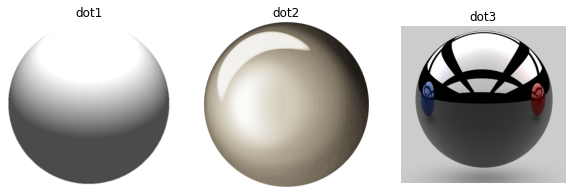

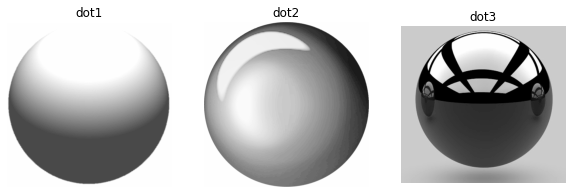

In [20]:
### TRY  FUNCTIONS ###
img1 =  imread("dot1.PNG")
img2 =  imread("dot2.PNG")
img3 =  imread("dot3.PNG")
img_gray1 = imgray(img1)
img_gray2 = imgray(img2)
img_gray3 = imgray(img3)
summary(img_gray1)
imshow3(img1,img2,img3,title1="dot1",title2="dot2",title3="dot3")
imshow3(img_gray1,img_gray2,img_gray3,title1="dot1",title2="dot2",title3="dot3")

In [21]:
def create_color_level(n):
    """ Calculates the stepping of values  for a gray image of n bits"""
    
    if isinstance(n, int):                          # Only run if varaible is an integer
        limit = 2**n -1                             # Calculate all states
        stepping =  255/limit                       # Calculate stepping
        values = []                                 # Initiate values (empty list)
        for i in range(0,limit + 1):                # Iterate over bits
            values.append(int(0 + i*stepping))      # Append current value 
            
        return values
    
    else: 
        print("Input should be an intiger")         # Print warning message if number is a float
        
        
        
def color_bar(n,length=10):
    """ Returns a color bar """
    levels = create_color_level(n)                  # Returns a list of levels 
    
    ### Plot color bar ###
    fig, ax = plt.subplots(figsize=(length, 0.7))   # Create a plot with specific size 
    fig.subplots_adjust(bottom=0.5)                 # Adjust plot

    gray  =  plt.get_cmap("gray")                   # Select gray cmap
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
    label = f"Color Bar: {n} bits"                  # Set label 
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=gray),cax=ax, orientation='horizontal', label=label,ticks=levels)
    
    plt.show()
    
def p_norm_1d(a,b):
    """ Returns the p norm of two points in 1-D dimension """
    norm = abs(a-b)        # p norm in 1 dimenssion
    return norm 

def reduction(img_gray, bits,length=4):
    """ Reduces the number of bits image will have, using k nearest neighbors"""
    centroids = create_color_level(bits) # Returns a list of levels (this will become or neighbors)
    k = len(centroids)                   # Get len of centroids                     
    n = img_gray.shape[0]                # Get number of rows
    m = img_gray.shape[1]                # Get number of columns
    M = np.zeros((n,m),dtype=np.uint8)   # Copy gray matrix's shape
    for ni in range(0,n):                # iterate over columns
        for mi in range(0,m):            # iterate over rows
            distance = np.zeros((k,1))   # Create a vector of zeros to store distances
            for ki in range(0,k):        # Iterate over centroids idx
                ### compute euclidan distance in 1d for point and centroids ###
                distance[ki] = p_norm_1d(img_gray[ni,mi],centroids[ki]).astype(np.uint8)

            idx =       np.argmin(distance) # Get the argument with less distance 
            M[ni,mi] =  centroids[idx]      # Assign the new matrix the centroid that fitts it the best 

    plt.figure(figsize=(10, 3.5))           # Create figure
    gray  =  plt.get_cmap("gray")           # Get gray cmap for image
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
    plt.title(f" {bits} Bits")              # Set title of image
    plt.imshow(M,cmap=gray,norm=norm)       # Show image
    plt.axis("off")                         # Get rid of axis
    color_bar(bits,length=length)                # Plot colorbar 
    

In [22]:
def show_mat(A):
    """Plots Matrix with numerical value"""
    
    ai = A.shape[0]  # Get Matrix Higth                                                
    aj = A.shape[1]  # Get Matrix Width
    gray  =  plt.get_cmap("gray")                       # Select gray cmap
    norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)      # Normalize from 0 to 255
    plt.matshow(A, norm=norm,cmap=gray )                # Plot Matrix
    plt.axis("off")                                     # Turn off axis
    ### Iiterate over the 
    for i in range(0,ai):     # Iterate over rows 
        for j in range(0,aj): # Iterate over Columns 
            c = A[i,j]        # Get current value
            ### Print value ###
            plt.text(j, i, str(c), va='center', ha='center') 
    
    

# Convolcuiones 

In [23]:
# colors for print()
class color:
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.GREEN + "9/9/2020"+ color.END)

9/9/2020


In [24]:
def show_mat2(A,axis_n,ax,norma=True):
    """Plots Matrix with numerical value"""
    
    
    ai = A.shape[0]  # Get Matrix Higth                                                
    aj = A.shape[1]  # Get Matrix Width
    if norma:
        gray  =  plt.get_cmap("gray")                   # Select gray cmap
        norm  = mpl.colors.Normalize(vmin=0 ,vmax=255)  # Normalize from 0 to 255
        ax[axis_n].matshow(A, norm=norm,cmap=gray)                 # Plot Matrix
    else:
         norm  = mpl.colors.Normalize(vmin=-3,vmax=3)  # Normalize from 0 to 255
         gray  =  plt.get_cmap("Blues")                   # Select gray cmap
         ax[axis_n].matshow(A,cmap=gray,norm=norm)                 # Plot Matrix
        
    ax[axis_n].axis("off")                                             # Turn off axis
    ### Iiterate over the 
    for i in range(0,ai):     # Iterate over rows 
        for j in range(0,aj): # Iterate over Columns 
            c = A[i,j]        # Get current value
            ### Print value ###
            ax[axis_n].text(j, i, str(c), va='center', ha='center') 
    

def plot_matrix(matrix,kernel,Conv,conv_type="valid"):
    """ Plot Matrix, kernel and Convolution product"""
    
    ### Generate sublots ###
    fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(12,7),gridspec_kw={'width_ratios': [3, 1,2]})
    
    ### Plot original matrix ###
    ax[0].set_title("Original")
    show_mat2(matrix,0,ax)
    
    ### Plot kernel###
    ax[1].set_title("Filter")
    show_mat2(kernel,1,ax,norma=False)
    
    ### Plot Convolution ###
    ax[2].set_title(conv_type + " Convolution")
    show_mat2(Conv,2,ax)
    
    plt.show()
    
def valid_convolion(matrix,kernel,prt=True):
    """ Compute Valide Convolutionl"""
    
    ### DEFINE PARAMETERS ###
    n=matrix.shape[0] # Dimension of matrix's hight 
    m=matrix.shape[1] # Dimension of matrix's width 
    f=kernel.shape[0] # Dimensions of filters (Filters are always symetricalby convention)
    print(color.BOLD +"Shape of Matrix:"+ color.END,f"{n}x{m}",color.BOLD + "Shape of filter:"+ color.END, f"{f}x{f}")
    
    ### Calcuate step size ###
    ic = int(math.floor(n - f +1))
    jc = int(math.floor(m - f +1))
    ### Creates the Convolution object with zeros ###
    C=np.ones((ic ,jc )) 
    print(color.BOLD +"Convolution expceted output size:"+ color.END,f" {ic} x {jc}")
    
    ### Apply Convolution ###
    for i in range(ic):     
        for j in range(jc): 
            C[i,j]=(matrix[i:i+f,j:j+f]*kernel).sum()
     
    ### Print Answer if user wants it ###
    if prt == True:
        print(C)
    return C

In [25]:
kernel = np.array([[-1,0,1],[0,1,0],[-1,0,1]])             # Initiate Filter
Conv1 = valid_convolion(img_gray_10_8_1,kernel,prt=False)   # Do Valid Convolution
plt.imshow(img_gray_10_8_1,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv1,cmap = plt.get_cmap("gray") )
plt.title("Convolucion")
plt.show()

NameError: name 'img_gray_10_8_1' is not defined

In [17]:
kernel = np.array([[-1,0,1],[0,1,0],[-1,0,1]])             # Initiate Filter
Conv2 = valid_convolion(img_gray_10_8_2,kernel,prt=False)   # Do Valid Convolution
plot_matrix(img_gray_10_8_2,kernel,Conv)                   # Visualize Output

NameError: name 'img_gray_10_8_2' is not defined

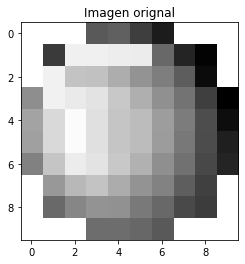

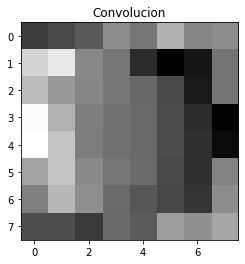

In [190]:
plt.imshow(img_gray_10_8_2,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv2,cmap = plt.get_cmap("gray") )
plt.title("Convolucion")
plt.show()

Shape of Matrix: 10x10 Shape of filter: 3x3
Convolution expceted output size:  8 x 8


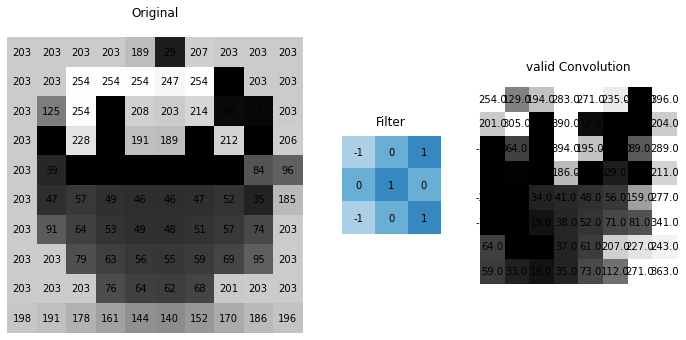

In [191]:
kernel = np.array([[-1,0,1],[0,1,0],[-1,0,1]])             # Initiate Filter
Conv = valid_convolion(img_gray_10_8_3,kernel,prt=False)   # Do Valid Convolution
plot_matrix(img_gray_10_8_3,kernel,Conv)                   # Visualize Output

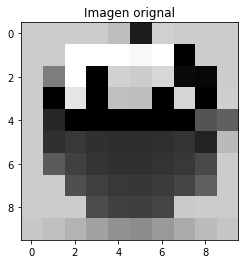

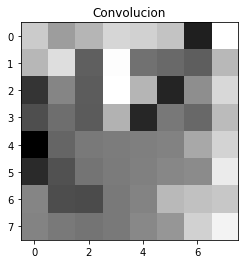

In [192]:
plt.imshow(img_gray_10_8_3,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv,cmap = plt.get_cmap("gray") )
plt.title("Convolucion")
plt.show()

Shape of Matrix: 10x10 Shape of filter: 3x3
Convolution expceted output size:  8 x 8


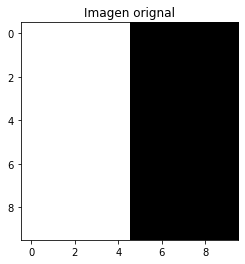

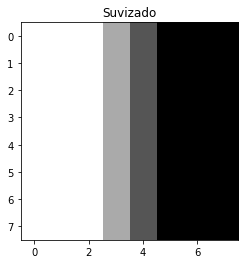

In [193]:
kernel = np.ones((3,3),dtype=np.uint8)
rows = [255,255,255,255,255,0,0,0,0,0]
Ma = np.array((rows,rows,rows,rows,rows,rows,rows,rows,rows,rows))
Conv = valid_convolion(Ma,kernel,prt=False)   # Do Valid Convolution
plt.imshow(Ma,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv,cmap = plt.get_cmap("gray") )
plt.title("Suvizado")
plt.show()

Shape of Matrix: 10x10 Shape of filter: 5x5
Convolution expceted output size:  6 x 6


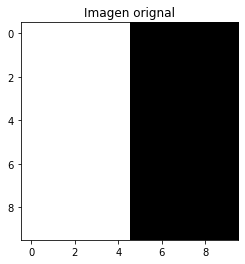

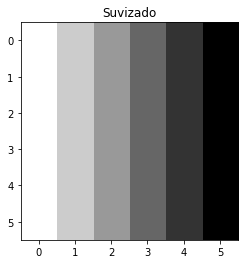

In [194]:
kernel = np.ones((5,5),dtype=np.uint8)

rows = [255,255,255,255,255,0,0,0,0,0]
Ma = np.array((rows,rows,rows,rows,rows,rows,rows,rows,rows,rows))
Conv = valid_convolion(Ma,kernel,prt=False)   # Do Valid Convolution
plt.imshow(Ma,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv,cmap = plt.get_cmap("gray") )
plt.title("Suvizado")
plt.show()

Shape of Matrix: 10x10 Shape of filter: 3x3
Convolution expceted output size:  8 x 8


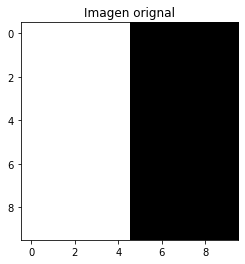

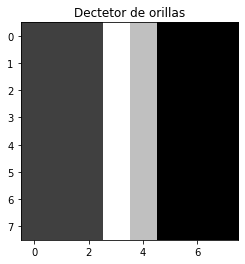

In [196]:
kernel = np.array([[1,0,-1],[1,1,-1],[1,0,-1]])     

rows = [255,255,255,255,255,0,0,0,0,0]
Ma = np.array((rows,rows,rows,rows,rows,rows,rows,rows,rows,rows))
Conv = valid_convolion(Ma,kernel,prt=False)   # Do Valid Convolution
plt.imshow(Ma,cmap = plt.get_cmap("gray")  )
plt.title("Imagen orignal")
plt.show()
plt.imshow(Conv,cmap = plt.get_cmap("gray") )
plt.title("Dectetor de orillas")
plt.show()